In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.4 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
rna

AnnData object with n_obs × n_vars = 208750 × 846
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'sample_id'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'fine_clustering_colors', 'hvg', 'initial_clustering_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
  

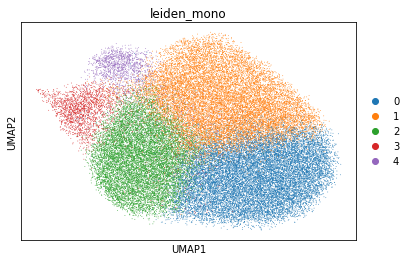

In [3]:
rnax = sc.read_h5ad('h5ad/classical_mono_rna.h5ad')
sc.pl.umap(rnax, color = 'leiden_mono')

In [4]:
len(list(set(rnax.obs['leiden_mono'])))

5

In [5]:
newdict = {'0':'Classical_mono_0',
'1':'Classical_mono_1',
'2':'Classical_mono_2',
'3':'Classical_mono_3',
'4':'Classical_mono_4'}
rnax.obs['fine_clustering_mono'] = [newdict[x] for x in rnax.obs['leiden_mono']]

In [6]:
rna.obs['fine_clustering_mono'] = rna.obs['fine_clustering'].astype('object')
rna.obs['fine_clustering_mono'].update(rnax.obs['fine_clustering_mono'])
# set up the metadata
rna.obs['cell_type'] = [a +'_' + b for a,b in zip(rna.obs['treatment_group_1'], rna.obs['fine_clustering_mono'])]

In [7]:
sorted(list(set(rna.obs['fine_clustering'])))

['B_naive',
 'B_non-switched_memory',
 'B_switched_memory',
 'CD16neg_NK',
 'CD16pos_NK',
 'CD16pos_SIGLEC7_NK',
 'CD4_Tcm',
 'CD4_Tem',
 'CD4_Th2',
 'CD4_Tnaive',
 'CD4_Treg',
 'CD8_Tem',
 'CD8_Temra',
 'CD8_Tnaive',
 'Classical_mono',
 'Erythrocyte',
 'HSC',
 'Intermediate_mono',
 'MAIT',
 'Megakaryocyte',
 'NKT',
 'Non-classical_mono',
 'Non-classical_mono_C1Q+',
 'Plasmablast',
 'Proliferating_lymphocyte',
 'Vd1_gdT',
 'Vd2_gdT',
 'cDC1',
 'cDC2',
 'doublets',
 'pDC']

In [8]:
# subset to just mnp and T cells
rna = rna[~(rna.obs['fine_clustering'].isin(['Erythrocyte','Proliferating_lymphocyte','Megakaryocyte', 'HSC', 'doublets']))].copy()
rna

AnnData object with n_obs × n_vars = 184882 × 846
    obs: 'sampleid', 'sampleid_study', 'timepoint', 'treatment', 'study_id', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'is_doublet', 'filter_rna', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'fine_clustering', 'treatment_timepoint', 'sex', 'age', 'peak_trop', 'BNP', 'on_treatment_CRP', 'AEs', 'treatment_group_1', 'treatment_group_2', 'Lymph', 'CD4', 'CD8', 'Treg', 'sample_id', 'fine_clustering_mono', 'cell_type'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'fine_clustering_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'study_id_colors', 'timepoint_colors', 'treatment_colors', 'treatment_timepoint_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 

In [9]:
meta = pd.DataFrame(rna.obs['cell_type'])
meta.reset_index(drop = False, inplace = True)
meta.columns = ['Cell', 'cell_type']

In [10]:
rna = rna.raw.to_adata()
rna.var

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000238009,Gene Expression,False,48,0.000203,99.979657,47.910553,41,False,0.001283,2.194514,0.126460
AL627309.2,ENSG00000239906,Gene Expression,False,12,0.000051,99.994914,11.921763,11,False,0.000331,2.026852,-0.277338
AL669831.5,ENSG00000237491,Gene Expression,False,591,0.002454,99.749522,579.089417,475,False,0.012285,2.007679,-0.323515
FAM87B,ENSG00000177757,Gene Expression,False,27,0.000113,99.988557,26.742092,22,False,0.000653,2.112959,-0.069958
LINC00115,ENSG00000225880,Gene Expression,False,1304,0.005496,99.447338,1296.692627,1133,False,0.032796,2.326272,0.443789
...,...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,ENSG00000278384,Gene Expression,False,157,0.000657,99.933460,155.127823,123,False,0.003436,2.045849,-0.231585
AC004556.1,ENSG00000276345,Gene Expression,False,1615,0.006936,99.315530,1636.595703,1397,False,0.030285,1.853748,-0.694244
AC233755.2,ENSG00000277856,Gene Expression,False,23,0.000186,99.990252,44.000000,19,False,0.001423,3.684731,3.715515
AC233755.1,ENSG00000275063,Gene Expression,False,135,0.007627,99.942784,1799.661499,104,True,0.019201,4.364148,5.351830


In [11]:
rna.var.reset_index(drop = False, inplace = True)
rna.var

,index,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
0,AL627309.1,ENSG00000238009,Gene Expression,False,48,0.000203,99.979657,47.910553,41,False,0.001283,2.194514,0.126460
1,AL627309.2,ENSG00000239906,Gene Expression,False,12,0.000051,99.994914,11.921763,11,False,0.000331,2.026852,-0.277338
2,AL669831.5,ENSG00000237491,Gene Expression,False,591,0.002454,99.749522,579.089417,475,False,0.012285,2.007679,-0.323515
3,FAM87B,ENSG00000177757,Gene Expression,False,27,0.000113,99.988557,26.742092,22,False,0.000653,2.112959,-0.069958
4,LINC00115,ENSG00000225880,Gene Expression,False,1304,0.005496,99.447338,1296.692627,1133,False,0.032796,2.326272,0.443789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21228,AL354822.1,ENSG00000278384,Gene Expression,False,157,0.000657,99.933460,155.127823,123,False,0.003436,2.045849,-0.231585
21229,AC004556.1,ENSG00000276345,Gene Expression,False,1615,0.006936,99.315530,1636.595703,1397,False,0.030285,1.853748,-0.694244
21230,AC233755.2,ENSG00000277856,Gene Expression,False,23,0.000186,99.990252,44.000000,19,False,0.001423,3.684731,3.715515
21231,AC233755.1,ENSG00000275063,Gene Expression,False,135,0.007627,99.942784,1799.661499,104,True,0.019201,4.364148,5.351830


In [12]:
rna.var.set_index('gene_ids', inplace = True)
rna.var

,index,feature_types,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
gene_ids,,,,,,,,,,,,
ENSG00000238009,AL627309.1,Gene Expression,False,48,0.000203,99.979657,47.910553,41,False,0.001283,2.194514,0.126460
ENSG00000239906,AL627309.2,Gene Expression,False,12,0.000051,99.994914,11.921763,11,False,0.000331,2.026852,-0.277338
ENSG00000237491,AL669831.5,Gene Expression,False,591,0.002454,99.749522,579.089417,475,False,0.012285,2.007679,-0.323515
ENSG00000177757,FAM87B,Gene Expression,False,27,0.000113,99.988557,26.742092,22,False,0.000653,2.112959,-0.069958
ENSG00000225880,LINC00115,Gene Expression,False,1304,0.005496,99.447338,1296.692627,1133,False,0.032796,2.326272,0.443789
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000278384,AL354822.1,Gene Expression,False,157,0.000657,99.933460,155.127823,123,False,0.003436,2.045849,-0.231585
ENSG00000276345,AC004556.1,Gene Expression,False,1615,0.006936,99.315530,1636.595703,1397,False,0.030285,1.853748,-0.694244
ENSG00000277856,AC233755.2,Gene Expression,False,23,0.000186,99.990252,44.000000,19,False,0.001423,3.684731,3.715515


In [13]:
if not os.path.exists('cpdb'):
    os.makedirs('cpdb')

In [14]:
meta.to_csv('cpdb/meta.txt', index = False, sep = '\t')

In [15]:
rna.write('cpdb/rna.h5ad', compression = 'gzip')

... storing 'fine_clustering_mono' as categorical
... storing 'cell_type' as categorical


```bash
conda activate cpdb
cd /lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy/cpdb/job
# cellphonedb method statistical_analysis meta.txt rna.h5ad --output-path=out --iterations=1000 --threads=32
bsub < cpdb.sh
```